In [152]:
import pandas as pd

df = pd.read_excel('data.xlsx')
df.head(10)

,client_id,sum,status,sale,new/current,Unnamed: 5,document,receiving_date
0,NaN,NaN,Май 2021,NaN,NaN,NaN,NaN,NaN
1,6.0,11693.7,ВНУТРЕННИЙ,-,-,NaN,-,-
2,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,NaN,оригинал,2021-07-26 00:00:00
3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,2021-06-08 00:00:00
4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,2021-06-08 00:00:00
5,18.0,4253.7,ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,2021-07-07 00:00:00
6,20.0,5796.7,ОПЛАЧЕНО,Кузнецова,текущая,NaN,оригинал,2021-07-15 00:00:00
7,21.0,3613.7,ОПЛАЧЕНО,Кузнецова,текущая,NaN,оригинал,2021-10-13 00:00:00
8,23.0,8511.7,ОПЛАЧЕНО,Андреев,текущая,NaN,оригинал,2021-06-08 00:00:00
9,24.0,16347.7,ОПЛАЧЕНО,Андреев,новая,NaN,оригинал,2021-06-23 00:00:00


Имеющиеся поля:

● client_id - ID клиента;

● sum – сумма денежных средств;

● status – статус оплаты;

● sale – менеджер, заключивший сделку;

● new/current – статус сделки;

● document – наличие оригинала подписанного договора с клиентом;

● receiving_date – дата получения оригинала договора.

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   client_id       724 non-null    float64
 1   sum             724 non-null    float64
 2   status          730 non-null    object 
 3   sale            724 non-null    object 
 4   new/current     724 non-null    object 
 5   Unnamed: 5      0 non-null      float64
 6   document        709 non-null    object 
 7   receiving_date  607 non-null    object 
dtypes: float64(3), object(5)
memory usage: 45.8+ KB


In [50]:
#удаление пустого столбц
df.drop('Unnamed: 5', axis=1, inplace=True)

In [51]:
df.head()

,client_id,sum,status,sale,new/current,document,receiving_date
0,NaN,NaN,Май 2021,NaN,NaN,NaN,NaN
1,6.0,11693.7,ВНУТРЕННИЙ,-,-,-,-
2,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,оригинал,2021-07-26 00:00:00
3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08 00:00:00
4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08 00:00:00


### 1) Вычислите общую выручку за июль 2021 по тем сделкам, приход денежных средств которых не просрочен.

In [52]:
#просмотр уникальных значений в колонке "статус"
df.status.unique()

array(['Май 2021', 'ВНУТРЕННИЙ', 'ОПЛАЧЕНО', 'ПРОСРОЧЕНО', 'Июнь 2021',
       'Июль 2021', 'Август 2021', 'В РАБОТЕ', 'Сентябрь 2021',
       'Октябрь 2021', 'НА ПОДПИСАНИИ'], dtype=object)

In [54]:
#замена значения "-" на пустое
df['receiving_date'] = df['receiving_date'].replace('-', pd.NaT)

# перевод столбеца 'receiving_date' в фoрмат datetime
df['receiving_date'] = pd.to_datetime(df['receiving_date'], errors='coerce')

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   client_id       724 non-null    float64       
 1   sum             724 non-null    float64       
 2   status          730 non-null    object        
 3   sale            724 non-null    object        
 4   new/current     724 non-null    object        
 5   document        709 non-null    object        
 6   receiving_date  606 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 40.0+ KB


In [153]:
#сортировка данных в соотвествии с условием
july_2021_df = df[(df['receiving_date'].dt.year == 2021) & (df['receiving_date'].dt.month == 7)]
july_2021_df = july_2021_df[july_2021_df['status'] != 'ПРОСРОЧЕНО']
july_2021_df

AttributeError: Can only use .dt accessor with datetimelike values

In [69]:
#посчет выручки
revenue = df['sum'].sum()
print(f'Общая выручка за июль 2021 по не просроченным сделкам равна {round(revenue, 2)}')

Общая выручка за июль 2021 по не просроченным сделкам равна 5185680.43


### 2) Как изменялась выручка компании за рассматриваемый период? Проиллюстрируйте графиком

In [95]:
#группировка данных по месяцам и подсчет выручки за каждый месяц
revenue_by_month = df.groupby(df['receiving_date'].dt.to_period('M'))['sum'].sum()
revenue_by_month

receiving_date
2021-05     43925.30
2021-06    499499.57
2021-07    766734.44
2021-08    862503.76
2021-09    870410.97
2021-10    857668.33
2021-11    375606.30
Freq: M, Name: sum, dtype: float64

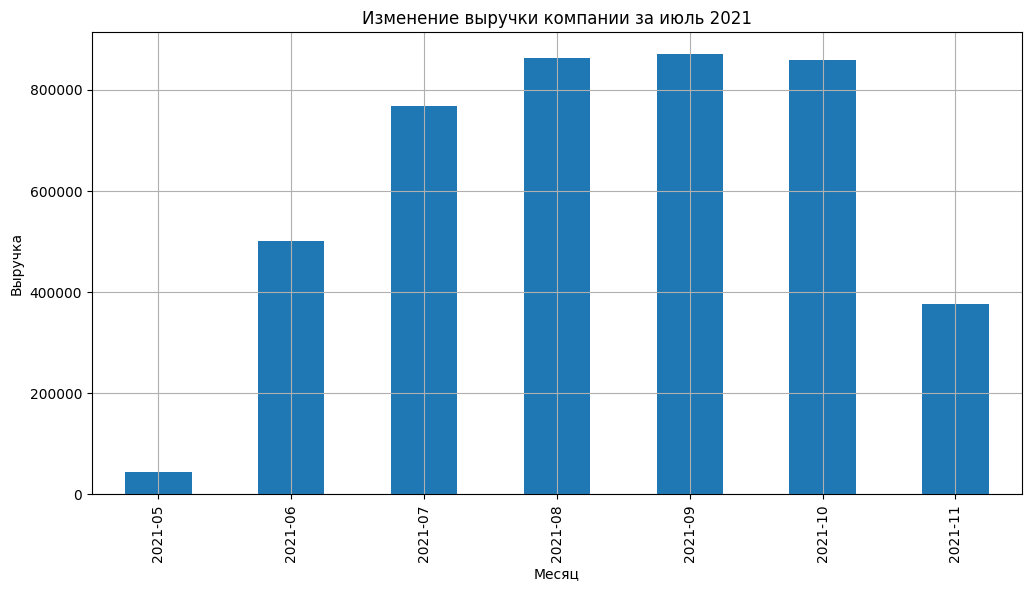

In [100]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 6))
revenue_by_month.plot( kind='bar')
plt.title('Изменение выручки компании за июль 2021')
plt.xlabel('Месяц')
plt.ylabel('Выручка')
plt.grid(True)
plt.show()

Из графика видно, что выручка имеет положительную динамику, выходит на плато. Однако в ноябре видна просадка в выручке.

### 3) Кто из менеджеров привлек для компании больше всего денежных средств в сентябре 2021?

In [103]:
#сортировка данных по условию
mng_df = df[(df['receiving_date'].dt.year == 2021) & (df['receiving_date'].dt.month == 9)]

In [104]:
mng_df.head()

,client_id,sum,status,sale,new/current,document,receiving_date
21,46.0,4945.7,ОПЛАЧЕНО,Петрова,текущая,оригинал,2021-09-23
22,47.0,4449.7,ОПЛАЧЕНО,Петрова,текущая,оригинал,2021-09-23
23,49.0,7203.7,ОПЛАЧЕНО,Петрова,текущая,оригинал,2021-09-23
29,59.0,3938.7,ОПЛАЧЕНО,Петрова,текущая,оригинал,2021-09-23
133,18.0,2996.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-09-09


In [154]:
#группировка данных по менеджеру и подсчет общей выручки по каждому из них
rev_mng = mng_df.groupby('sale')['sum'].sum().sort_values(ascending=False)
rev_mng

sale
Петрова       219240.12
Иванов        165314.80
Смирнов       155245.90
Андреев       124714.55
Кузнецова      60230.20
Васильев       55667.50
Филимонова     45763.30
Соколов        44234.60
Name: sum, dtype: float64

In [114]:
print(f'Больше всего денежных средств привлек для компании менеждер {rev_mng.idxmax()}')

Больше всего денежных средств привлек для компании менеждер Петрова


### 4) Какой тип сделок (новая/текущая) был преобладающим в октябре 2021?

In [116]:
#сортировка данных
df_oct_2021 = df[(df['receiving_date'].dt.year == 2021) & (df['receiving_date'].dt.month == 10)]
df_oct_2021['new/current'].value_counts()

new/current
текущая    105
новая       17
Name: count, dtype: int64

В октябре 2021 года преоблдающим типом сделки была текущая сделка.

### 5) Сколько оригиналов договора по майским сделкам было получено в июне 2021?

In [121]:
jun_doc = df[(df['receiving_date'].dt.year == 2021) & (df['receiving_date'].dt.month == 6) \
             & (df['new/current'] == 'текущая')]
jun_doc['document'].value_counts()

document
оригинал    72
Name: count, dtype: int64

В июне 2021 по майским сделкам было получено 72 оригинала договора

### Задание:
За каждую заключенную сделку менеджер получает бонус, который рассчитывается
следующим образом:

1) За новые сделки менеджер получает 7 % от суммы, при условии, что статус оплаты «ОПЛАЧЕНО», а также имеется оригинал подписанного договора с
клиентом (в рассматриваемом месяце).

2) За текущие сделки менеджер получает 5 % от суммы, если она больше 10 тыс.,
и 3 % от суммы, если меньше. При этом статус оплаты может быть любым,
кроме «ПРОСРОЧЕНО», а также необходимо наличие оригинала подписанного
договора с клиентом (в рассматриваемом месяце).

Бонусы по сделкам, оригиналы для которых приходят позже рассматриваемого
месяца, считаются остатком на следующий период, который выплачивается по мере
прихода оригиналов. Вычислите остаток каждого из менеджеров на 01.07.2021.

In [137]:
def calculate_bonus(data):
  bonus = 0
  if data['status'] == 'ОПЛАЧЕНО' and data['document'] == 'оригинал':
    if data['new/current'] == 'новая':
      bonus = data['sum'] * 0.07
    elif data['new/current'] == 'текущая' and data['status'] != 'ПРОСРОЧЕНО':
      if data['sum'] > 10000:
        bonus = data['sum'] * 0.05
      bonus = data['sum'] * 0.03
  return bonus

In [138]:
df['bonus'] = df.apply(calculate_bonus, axis=1)
df

,client_id,sum,status,sale,new/current,document,receiving_date,bonus
0,NaN,NaN,Май 2021,NaN,NaN,NaN,NaT,0.000
1,6.0,11693.7,ВНУТРЕННИЙ,-,-,-,NaT,0.000
2,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,оригинал,2021-07-26,381.689
3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08,419.751
4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08,21.591
...,...,...,...,...,...,...,...,...
725,285.0,4328.7,ОПЛАЧЕНО,Васильев,текущая,оригинал,2021-11-15,129.861
726,360.0,3096.2,ОПЛАЧЕНО,Васильев,новая,НЕТ,NaT,0.000
727,360.0,3096.2,ПРОСРОЧЕНО,Васильев,новая,НЕТ,NaT,0.000
728,373.0,4403.7,ОПЛАЧЕНО,Михайлов,новая,оригинал,2021-11-08,308.259


In [151]:
bonus_mng = df[df.receiving_date > '2021-07-01'].groupby('sale').agg({'bonus': 'sum'}).reset_index()
bonus_mng.sort_values(by = 'bonus', ascending=False)

,sale,bonus
5,Петрова,22260.8152
7,Смирнов,21151.6340
0,Андреев,20669.7743
2,Иванов,15651.4060
3,Кузнецова,13763.8635
9,Филимонова,10830.5305
6,Селиванов,6868.3830
1,Васильев,6732.1245
8,Соколов,3260.0740
4,Михайлов,607.0680
